In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [8]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.drop("CustomerID",axis=1,inplace=True)

In [16]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Visualization 

### Gender Distribution

C:\Users\Salem\AppData\Local\Temp\ipykernel_19868\3533933231.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',palette=["Blue","Red"], data=df)


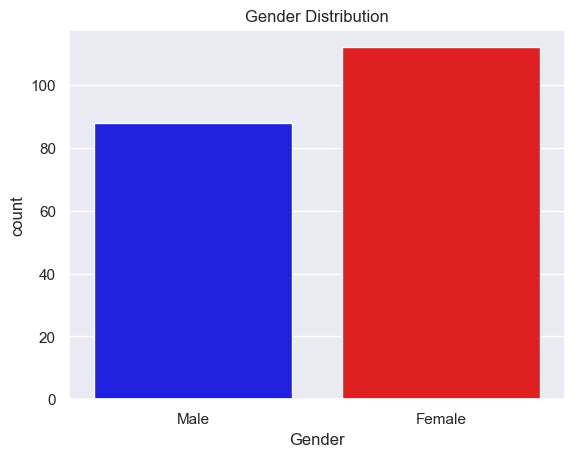

In [41]:

sns.countplot(x='Gender',palette=["Blue","Red"], data=df)
plt.title('Gender Distribution')
plt.show()

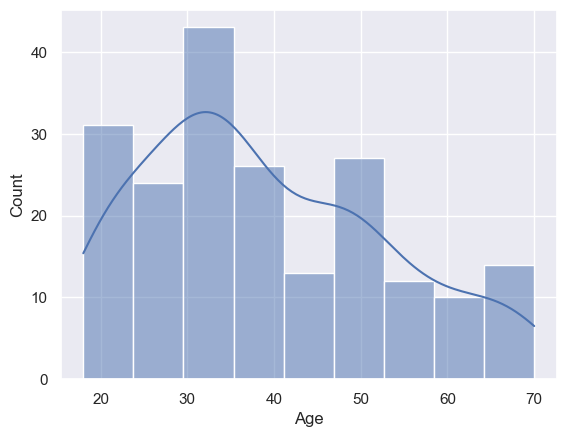

In [47]:
sns.histplot(x=df.Age,kde=True);

### Age Distribution

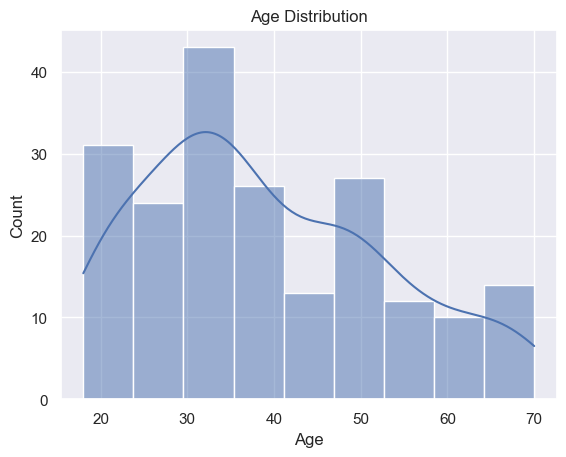

In [56]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [21]:
df.rename({"Annual Income (k$)"	:"Income"}, axis=1,inplace=True)

In [23]:
df.head()

,Gender,Age,Income,Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


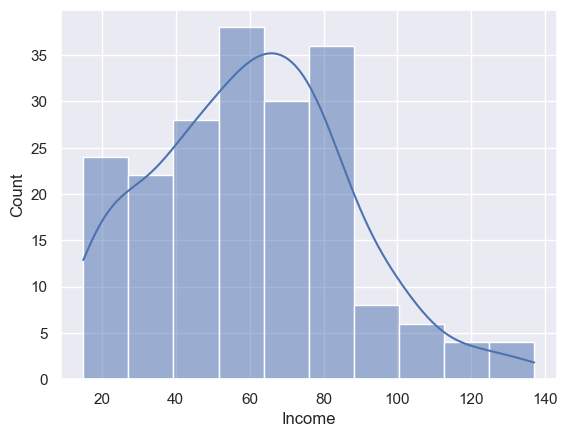

In [24]:
sns.histplot(x=df.Income,kde=True);

In [28]:
df.rename({"Spending Score (1-100)":"Score"},axis=1,inplace=True)

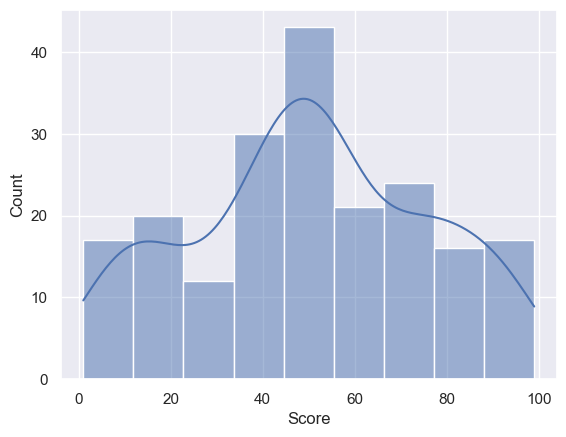

In [31]:
sns.histplot(df.Score, kde=True);

### Income vs Spending


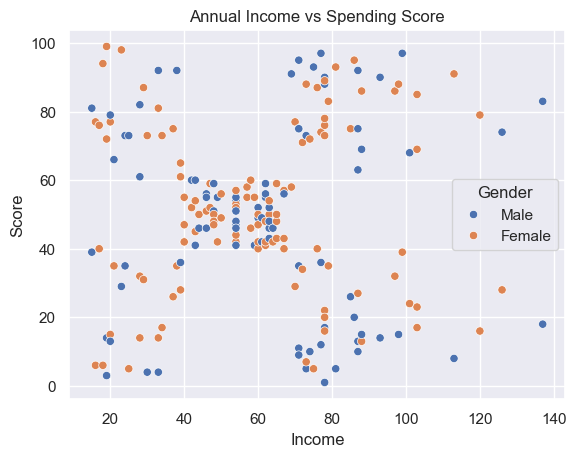

In [60]:
sns.scatterplot(data=df, x='Income', y='Score', hue='Gender')
plt.title("Annual Income vs Spending Score")
plt.show()

### Correlation Matrix

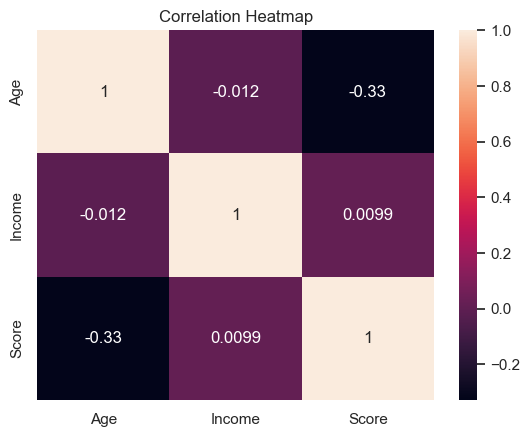

In [65]:
# Correlation Matrix
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Preprocessing 

In [76]:
X= df[['Income', 'Score']].values

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
# --- Find Optimal K ---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))


C:\Users\Salem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Salem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Salem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Salem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

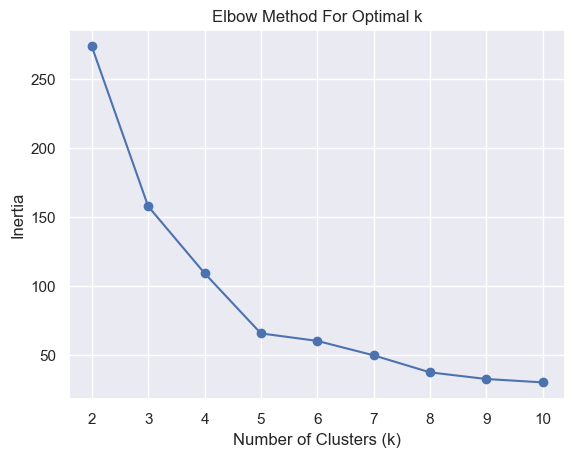

In [110]:
# Elbow Method
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

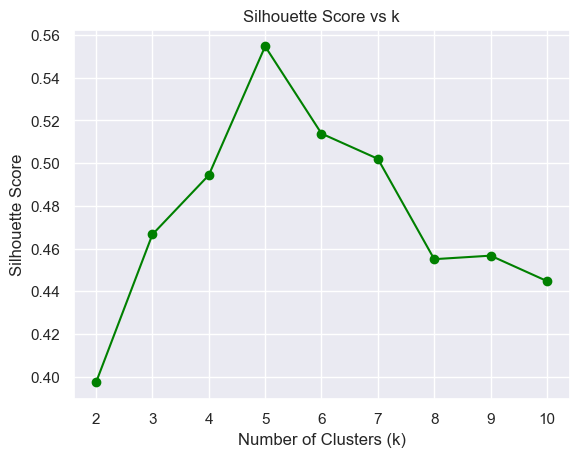

In [86]:
# Silhouette Score
plt.plot(k_range, silhouette, 'o-', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()


In [88]:
# --- Apply K-Means ---
optimal_k = 5  # Use from elbow/silhouette result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\Salem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


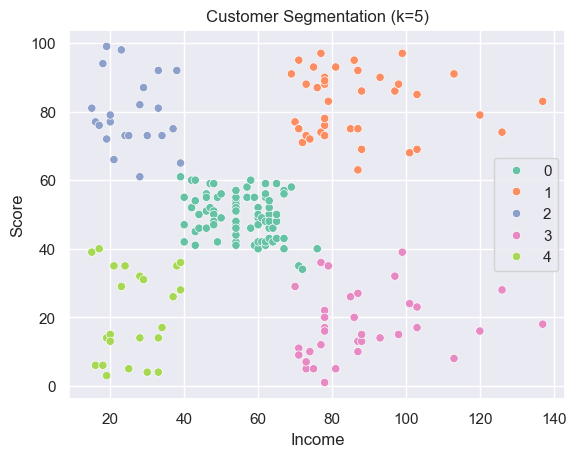

In [140]:
# --- Final Visualization ---
sns.scatterplot(data=df, x='Income', y='Score', hue='Cluster',palette="Set2")
#centers = scaler.inverse_transform(kmeans.cluster_centers_)
#plt.scatter(centers[:, 0], centers[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title(f'Customer Segmentation (k={optimal_k})')
plt.legend()
plt.show()

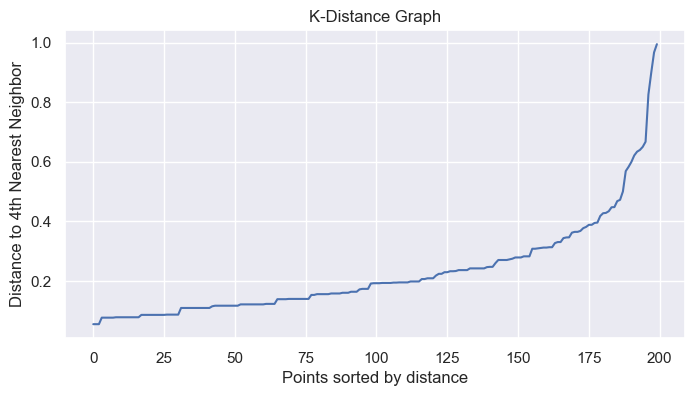

In [124]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 4  # min_samples - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

k_distances = np.sort(distances[:, k-1])
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.ylabel('Distance to 4th Nearest Neighbor')
plt.xlabel('Points sorted by distance')
plt.title('K-Distance Graph')
plt.grid(True)
plt.show()

In [134]:
# Tune these parameters as needed
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples=4)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

n_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'].values else 0)
n_noise = list(df['DBSCAN_Cluster']).count(-1)

print(f"Clusters found by DBSCAN: {n_clusters}")
print(f"Noise points: {n_noise}")


Clusters found by DBSCAN: 3
Noise points: 14


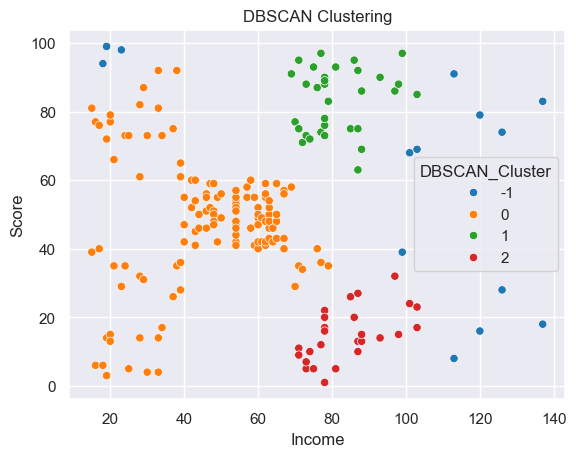

In [132]:
# Plot DBSCAN Results
sns.scatterplot(x='Income', y='Score', hue='DBSCAN_Cluster', data=df, palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()

In [136]:
import joblib

# Save the trained model and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']